<a href="https://colab.research.google.com/github/madhavreddy02/Assistive-Device/blob/main/ASL_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import json

# mnist = tf.keras.datasets.mnist
# (x_train, y_train), (x_test,y_test) = mnist.load_data()
# x_train = tf.keras.utils.normalize(x_train, axis=1)
# x_test = tf.keras.utils.normalize(x_test, axis=1)


# Example of loading Sign Language MNIST from a CSV file
import pandas as pd

# Assuming the dataset is in CSV format
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

# Filter the data to include only the first 10 letters (A-J)
train_df = train_df[train_df['label'].isin(range(10))]
test_df = test_df[test_df['label'].isin(range(10))]

# Separate features and labels
x_train = train_df.iloc[:, 1:].values  # Pixel values
y_train = train_df.iloc[:, 0].values   # Labels
x_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

# Reshape and normalize
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)




model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(64,activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(64,activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(32,activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.sigmoid))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100)
(val_loss,val_accuracy) = model.evaluate(x_test,y_test)

weightList = []
biasList = []
for i in range(1,len(model.layers)):
    weights = model.layers[i].get_weights()[0]
    weightList.append((weights.T).tolist())
    bias = [[float(b)] for b in model.layers[i].get_weights()[1]]
    biasList.append(bias)

data = {"weights": weightList,"biases":biasList}
f = open('weightsandbiases_128_64.txt', "w")
json.dump(data, f)
f.close()

Epoch 1/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1131 - loss: 2.2866
Epoch 2/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1255 - loss: 2.2078
Epoch 3/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1165 - loss: 2.1993
Epoch 4/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2345 - loss: 2.0329
Epoch 5/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2725 - loss: 1.8021
Epoch 6/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3433 - loss: 1.5314
Epoch 7/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3692 - loss: 1.3850
Epoch 8/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3865 - loss: 1.3021
Epoch 9/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4336 - loss: 1.2294
Epoch 10/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4664 - loss: 1.2040
Epoch 11/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4752 - loss: 1.1565
Epoch 12/100
310/310 ━━━━━━━━━━━━━━━━━━━━

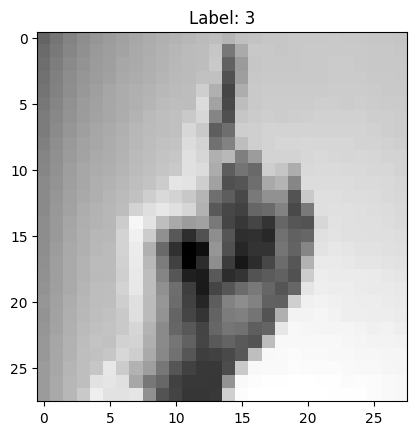

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('sign_mnist_train.csv')

# The first column contains the labels, and the rest are pixel values
labels = df.iloc[:, 0].values  # Extract the labels
images = df.iloc[:, 1:].values  # Extract the pixel values

# Reshape the pixel values into 28x28 images
images = images.reshape(-1, 28, 28)

# Normalize the images if needed (e.g., scale pixel values to [0, 1])
images = images / 255.0

# Display the first image and its label
plt.imshow(images[0], cmap='gray')
plt.title(f'Label: {labels[0]}')
plt.show()

# Now you have images and labels arrays that you can use for further processing


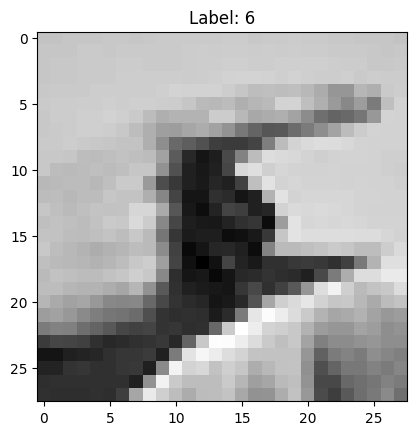

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def read_test_data(file_path, image_size=28):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Convert binary strings to integers
    pixel_values = [int(line.strip(), 2) for line in lines[:-1]]  # all but the last line for image data
    label = int(lines[-1].strip(), 2)  # last line for label

    # Reshape the pixel data to form the image
    image = np.array(pixel_values).reshape(image_size, image_size)

    return image, label

# Example usage
file_path = 'test_data_0000.txt'
image, label = read_test_data(file_path)

# Normalize the image if needed (e.g., scale pixel values to [0, 1])
image = image / (2 ** 16 - 1)  # Assuming 16-bit data width

# Display the image and its label
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()


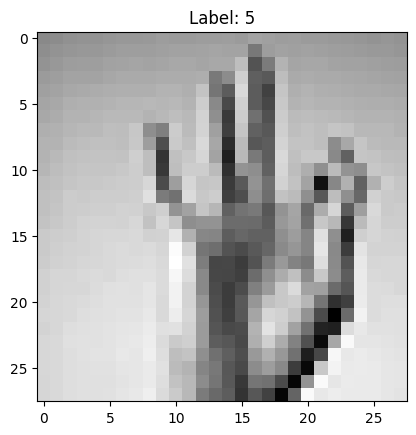

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('sign_mnist_test.csv')

# The first column contains the labels, and the rest are pixel values
labels = df.iloc[:, 0].values  # Extract the labels
images = df.iloc[:, 1:].values  # Extract the pixel values

# Reshape the pixel values into 28x28 images
images = images.reshape(-1, 28, 28)

# Normalize the images if needed (e.g., scale pixel values to [0, 1])
images = images / 255.0

# Display the first image and its label
plt.imshow(images[1], cmap='gray')
plt.title(f'Label: {labels[1]}')
plt.show()

# Now you have images and labels arrays that you can use for further processing


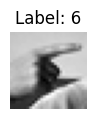

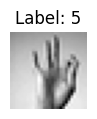

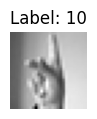

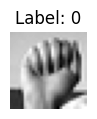

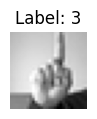

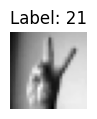

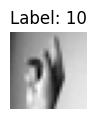

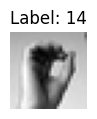

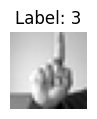

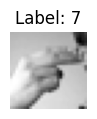

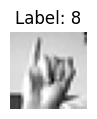

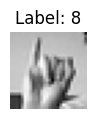

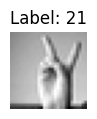

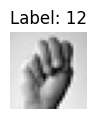

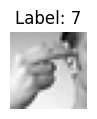

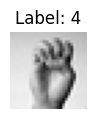

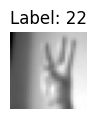

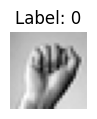

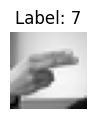

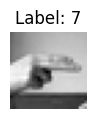

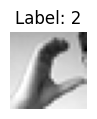

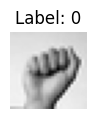

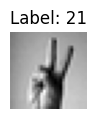

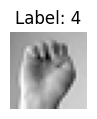

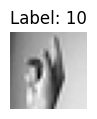

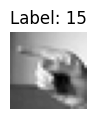

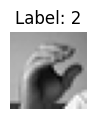

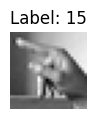

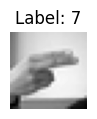

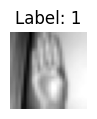

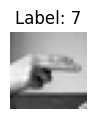

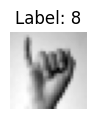

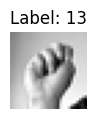

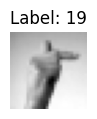

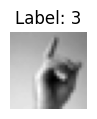

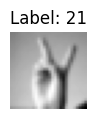

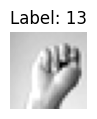

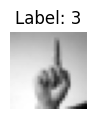

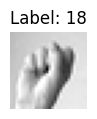

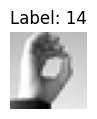

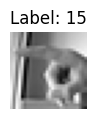

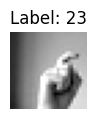

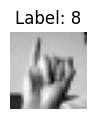

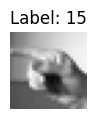

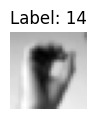

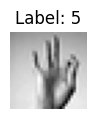

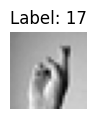

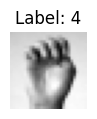

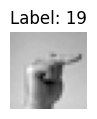

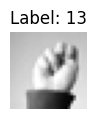

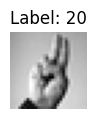

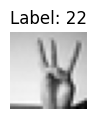

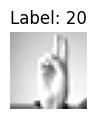

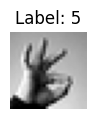

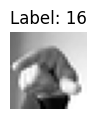

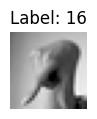

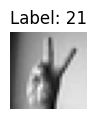

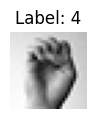

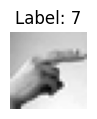

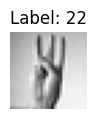

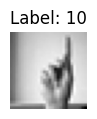

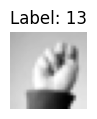

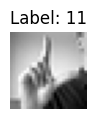

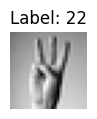

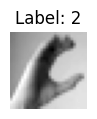

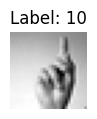

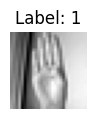

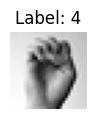

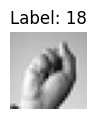

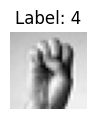

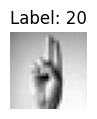

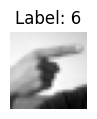

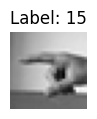

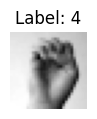

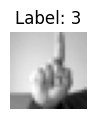

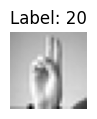

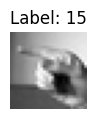

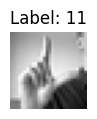

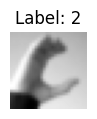

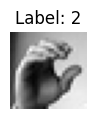

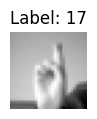

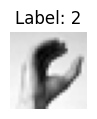

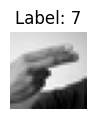

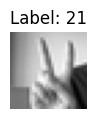

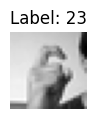

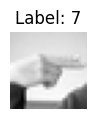

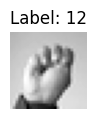

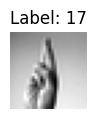

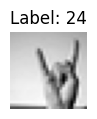

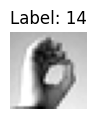

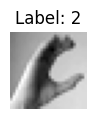

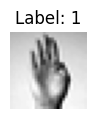

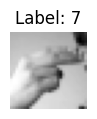

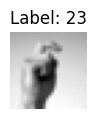

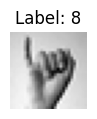

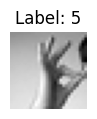

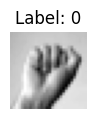

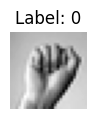

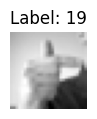

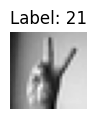

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('sign_mnist_test.csv')

# The first column contains the labels, and the rest are pixel values
labels = df.iloc[:, 0].values  # Extract the labels
images = df.iloc[:, 1:].values  # Extract the pixel values

# Reshape the pixel values into 28x28 images
images = images.reshape(-1, 28, 28)

# Normalize the images (e.g., scale pixel values to [0, 1])
images = images / 255.0

# Display the first 100 images and their labels
for i in range(100):
    plt.figure(figsize=(1, 1))  # Adjust figure size for better resolution
    plt.imshow(images[i], cmap='gray')
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')  # Hide the axis for clarity
    plt.show()


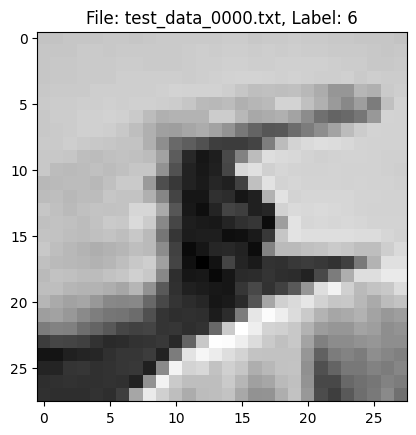

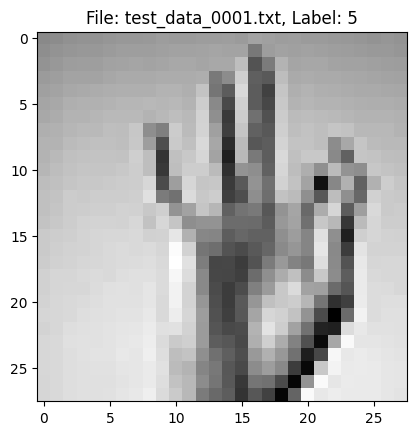

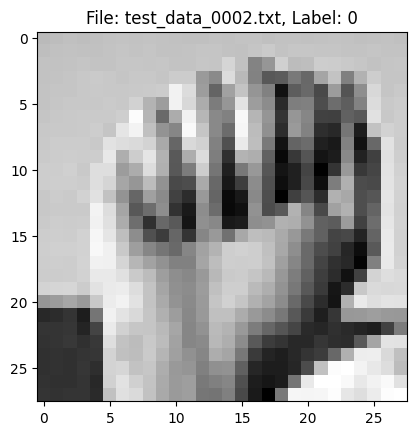

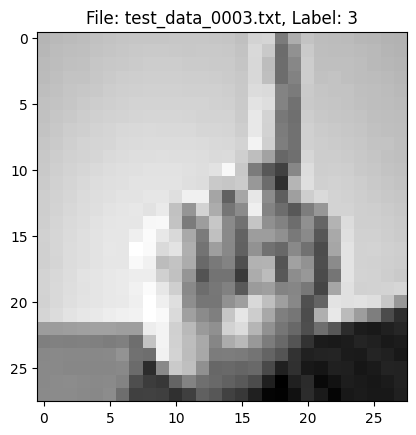

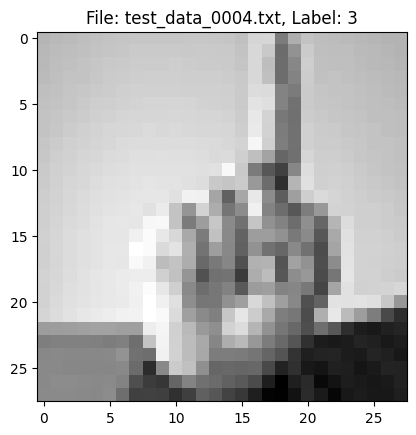

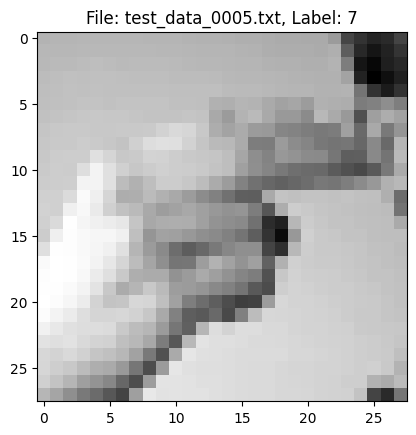

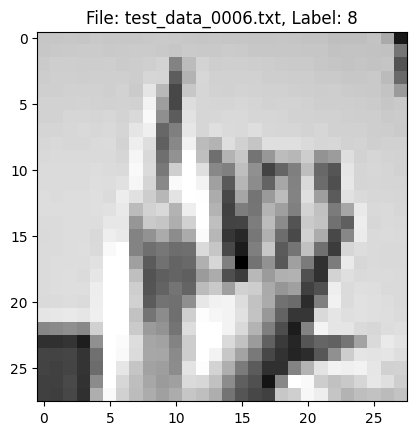

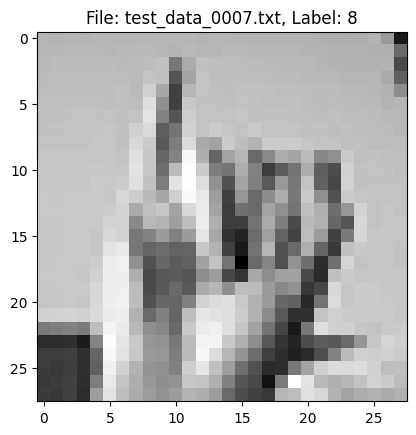

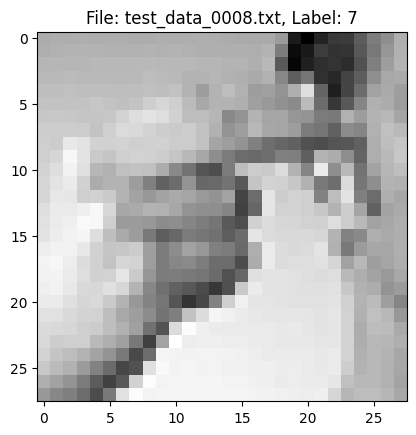

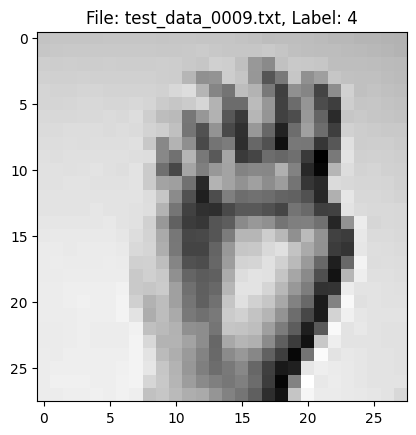

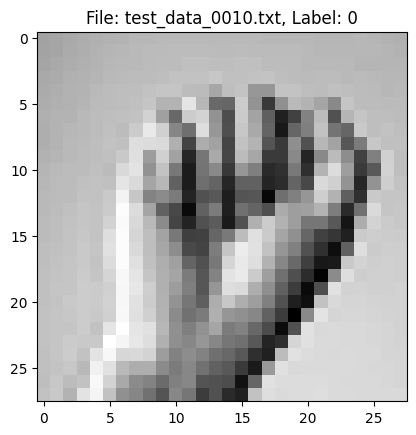

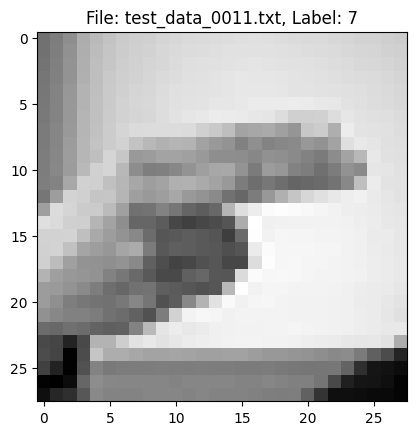

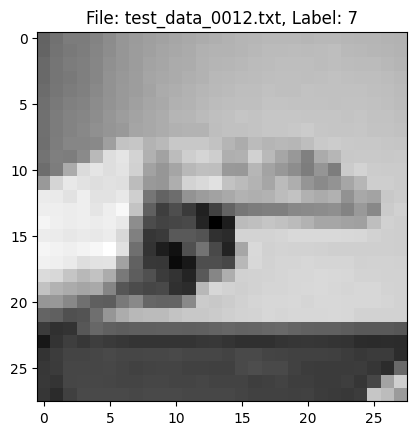

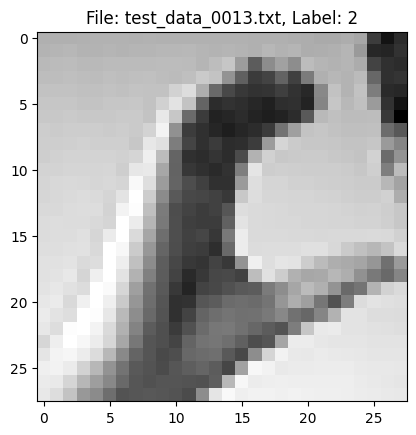

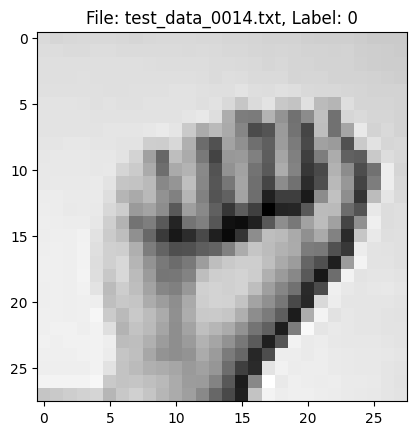

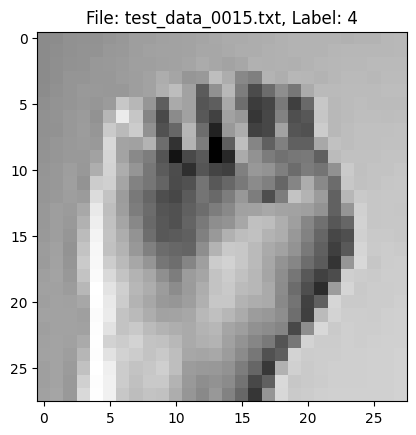

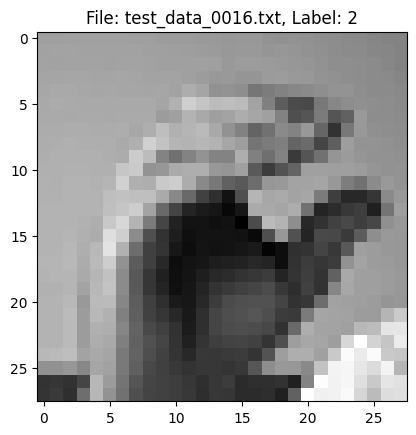

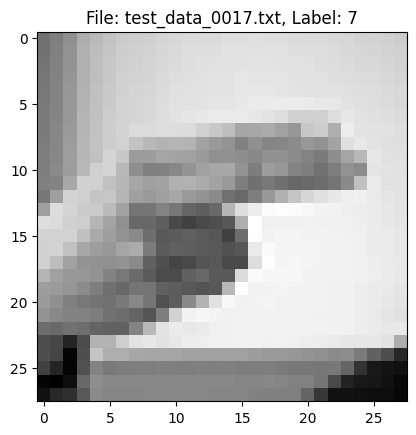

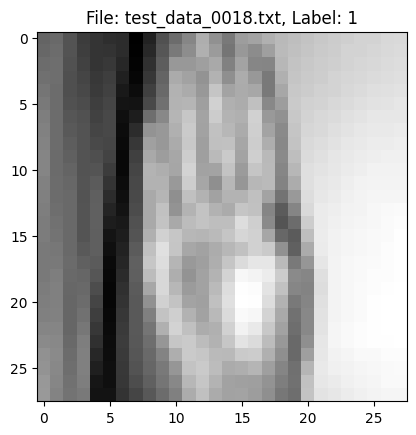

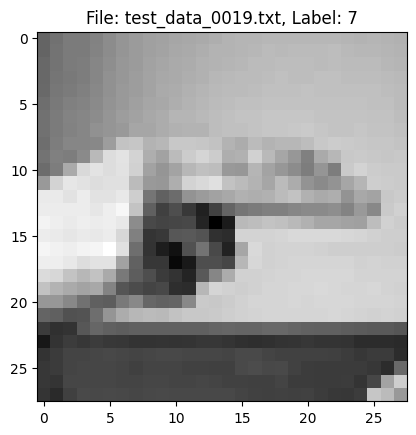

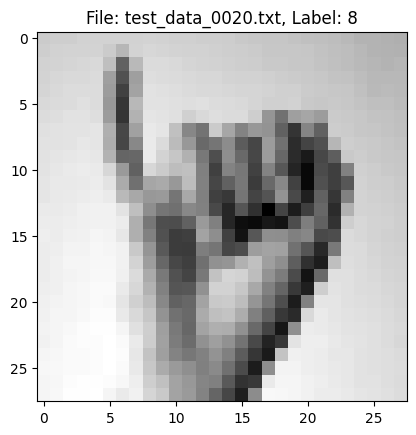

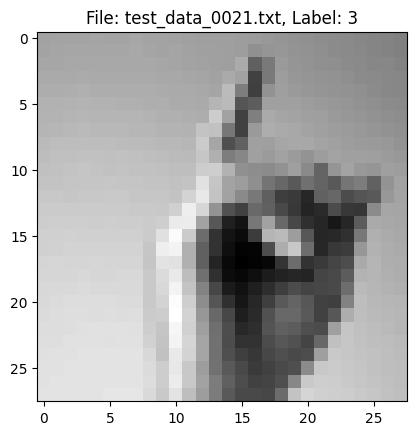

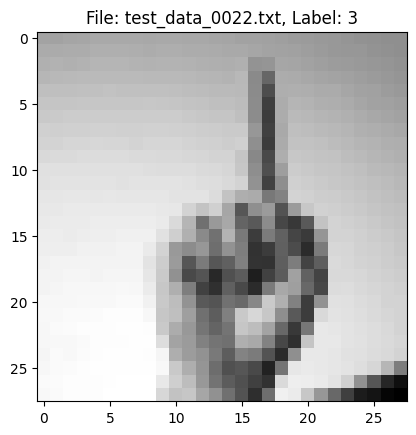

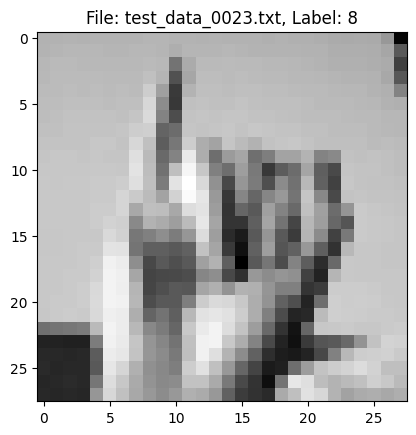

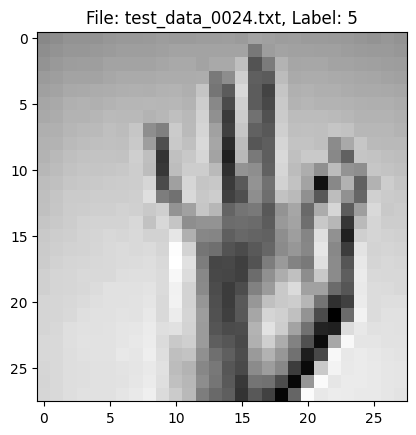

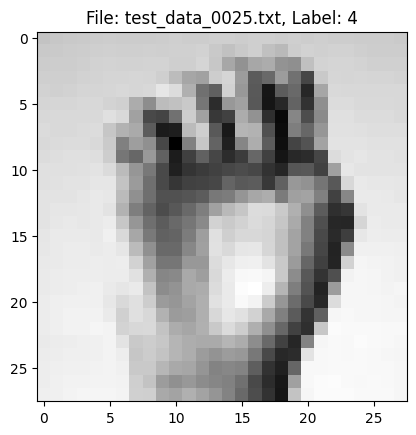

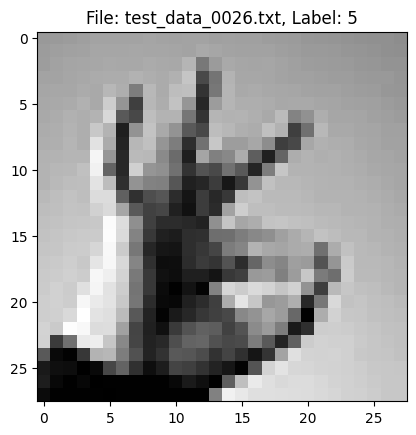

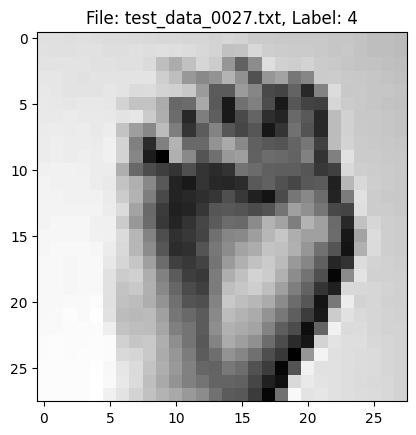

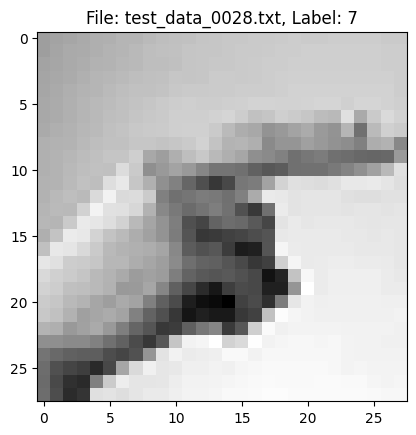

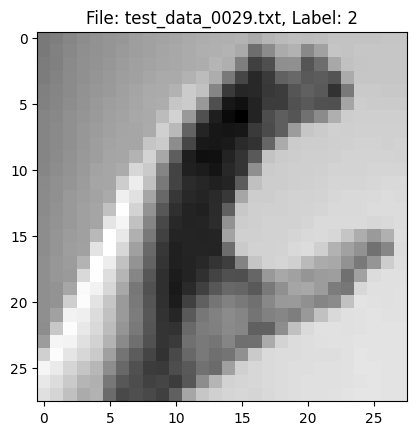

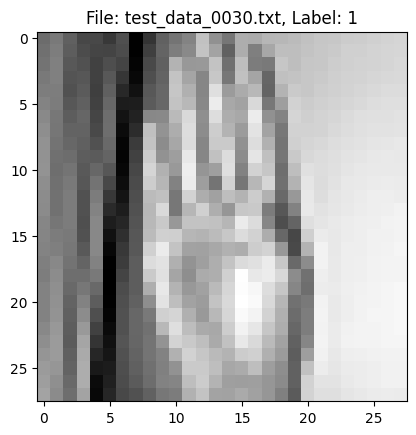

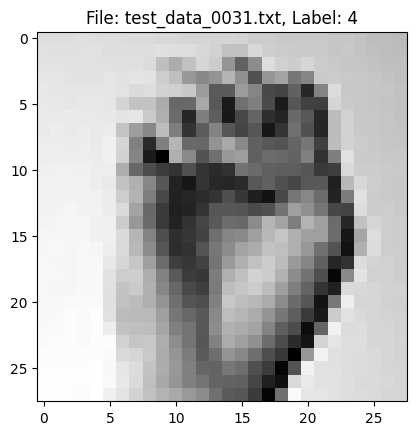

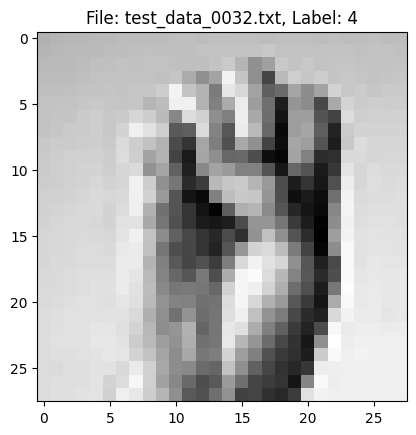

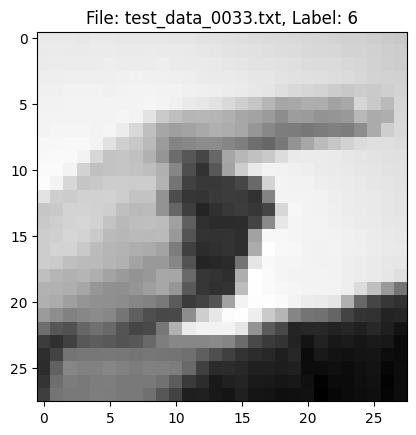

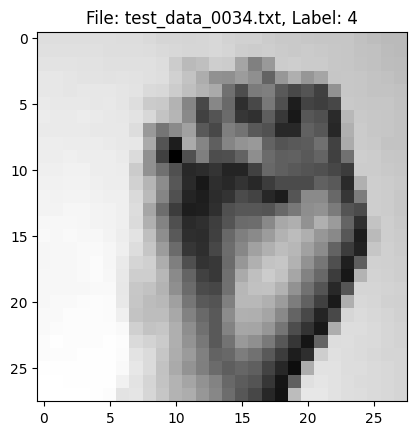

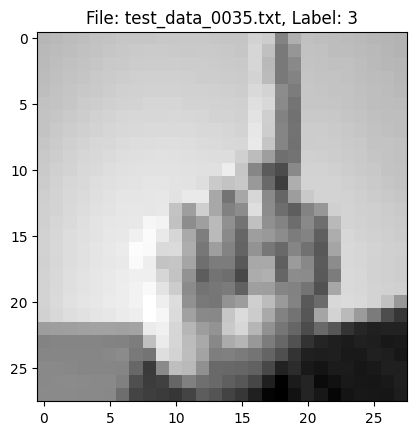

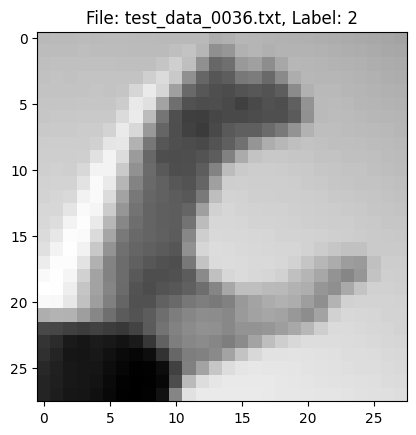

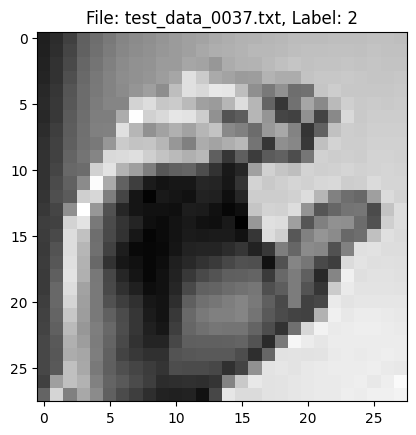

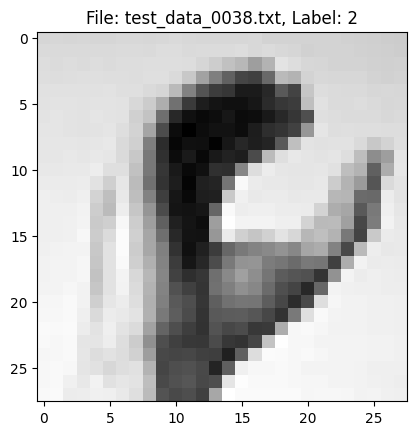

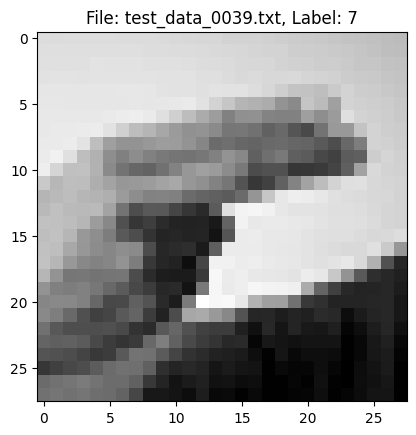

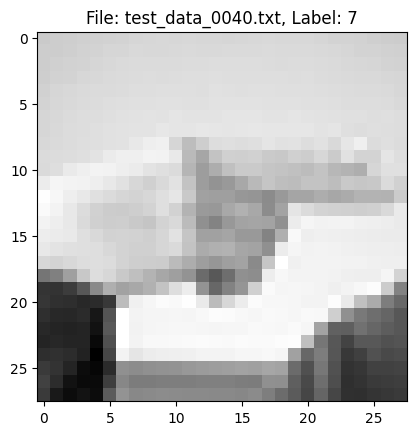

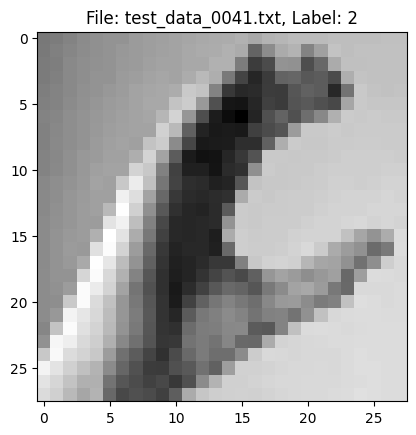

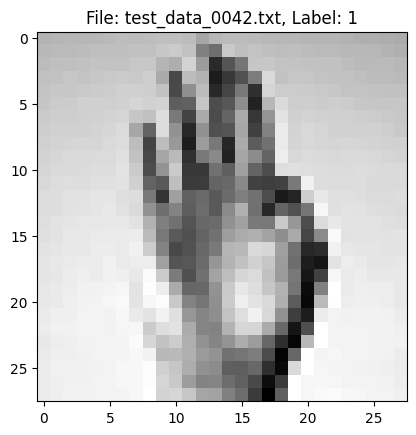

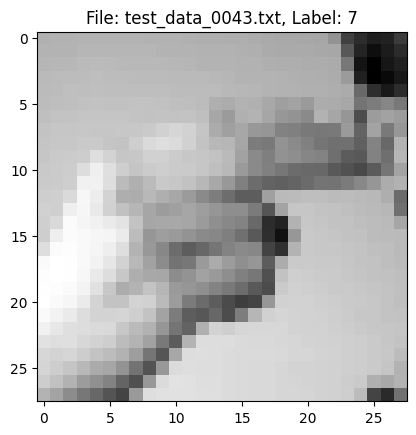

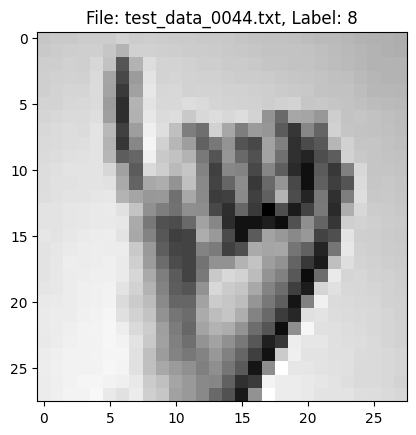

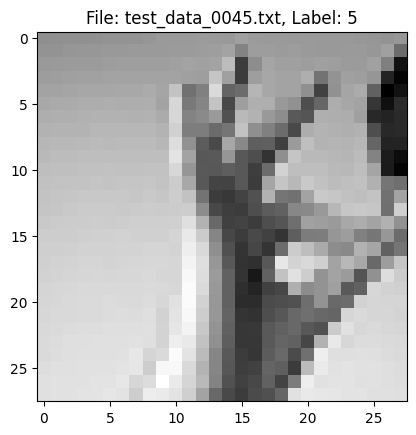

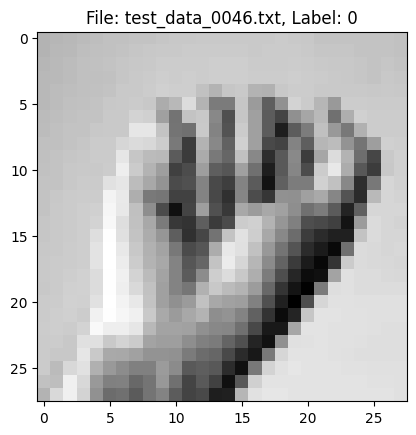

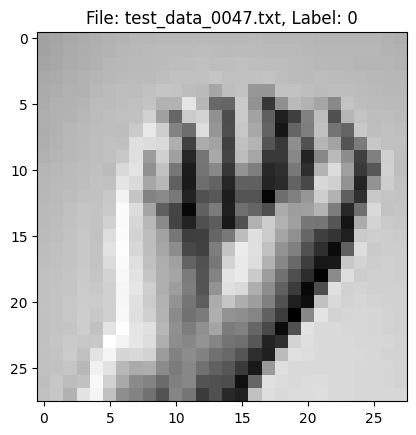

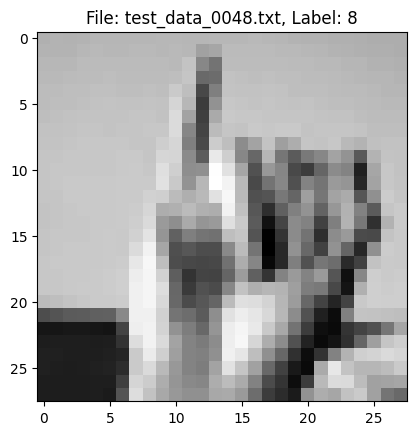

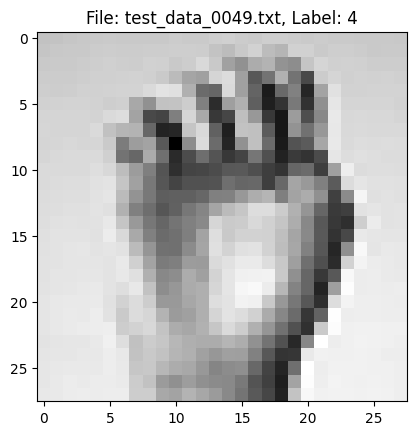

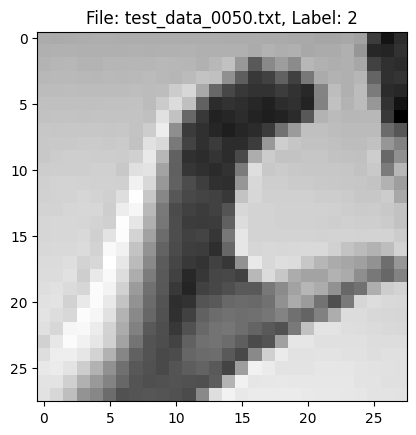

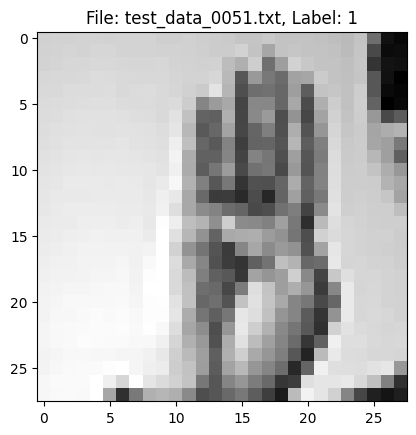

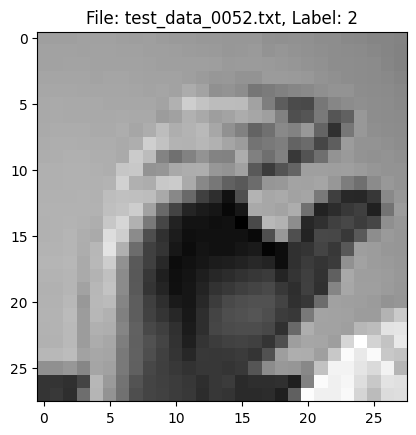

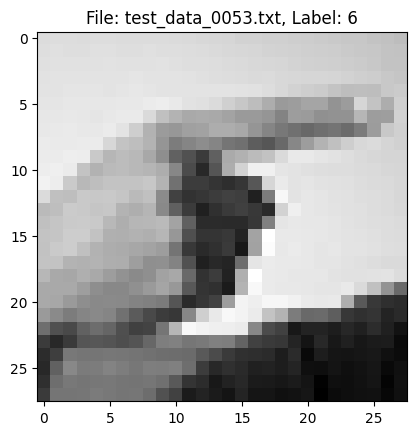

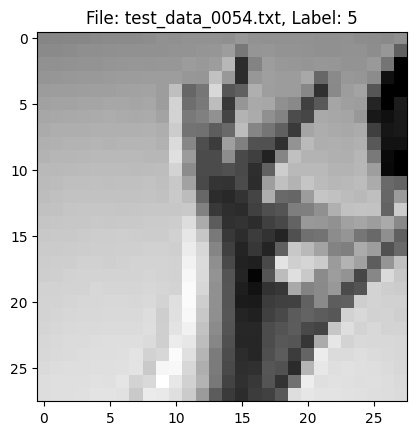

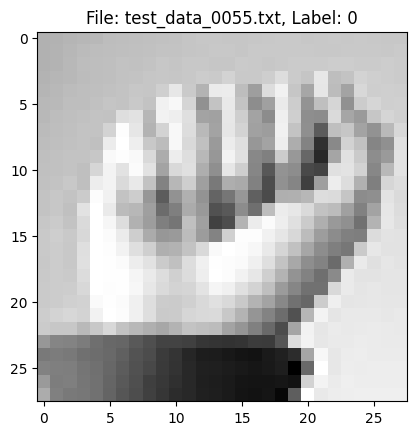

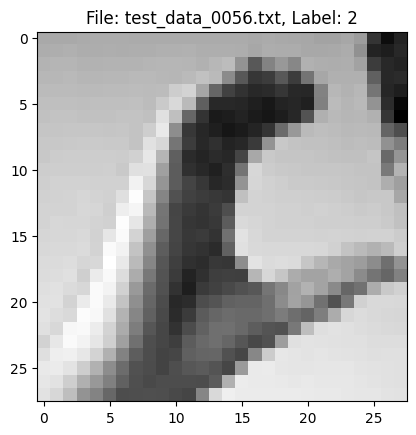

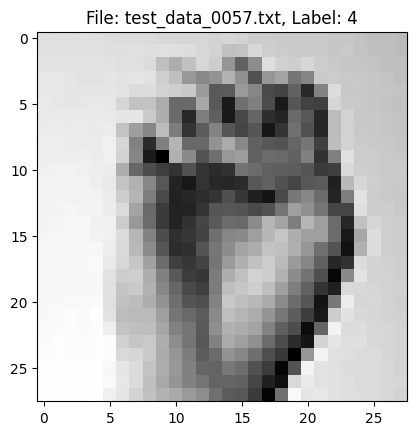

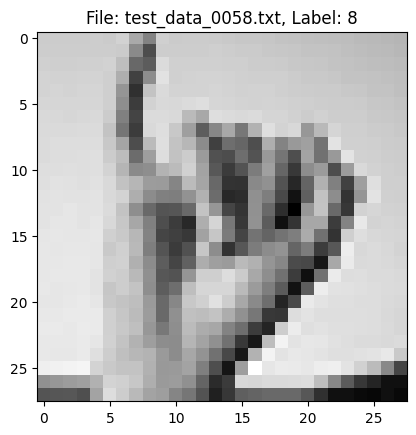

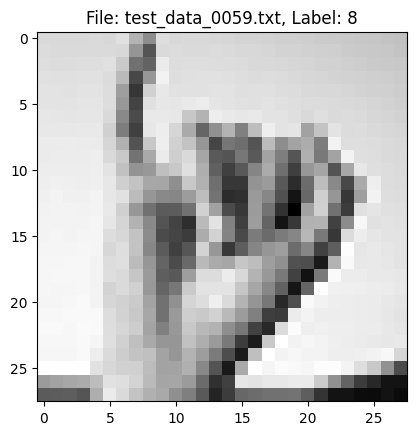

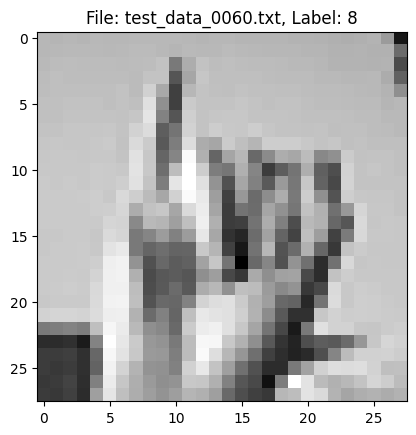

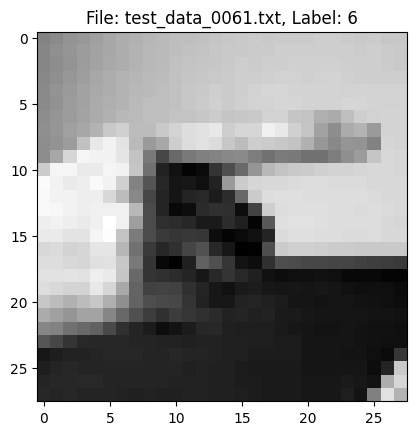

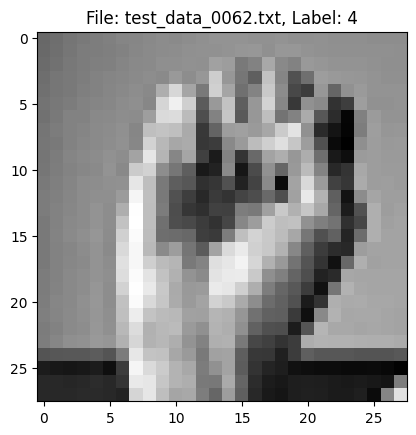

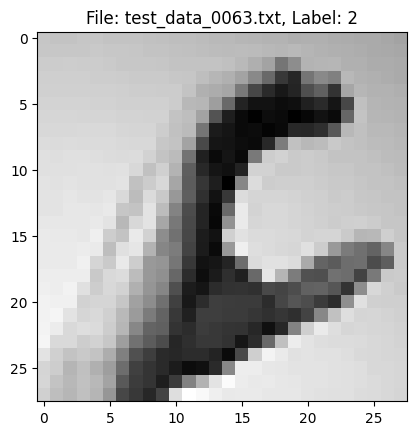

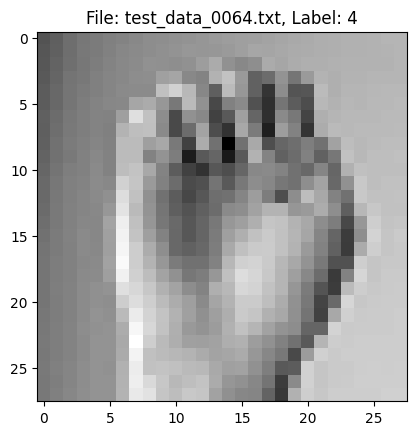

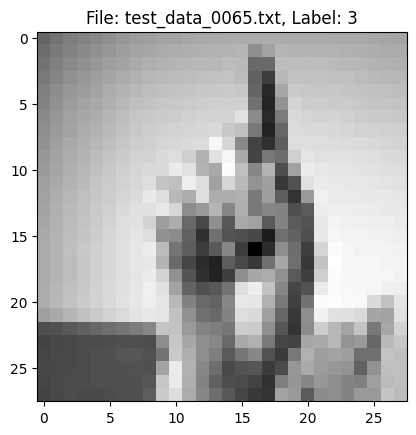

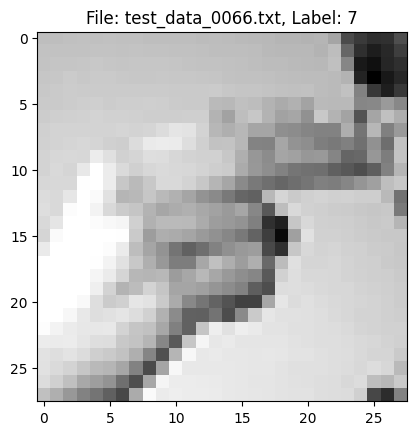

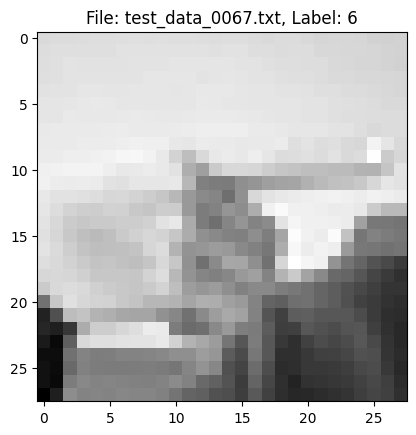

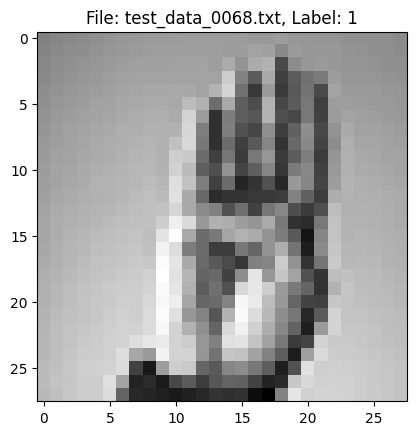

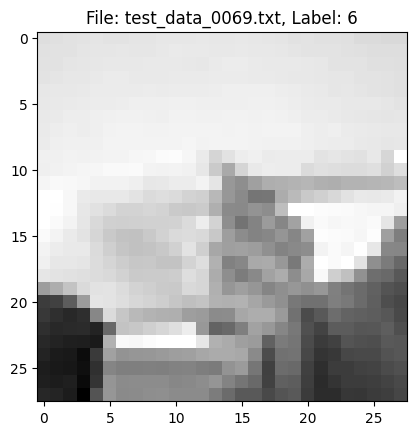

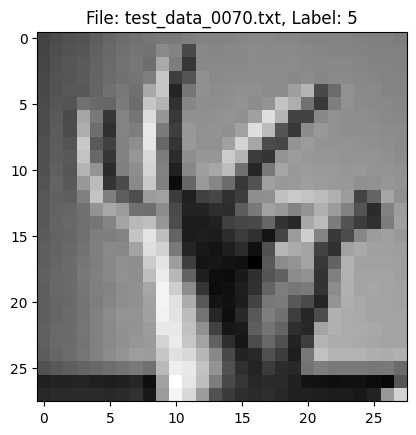

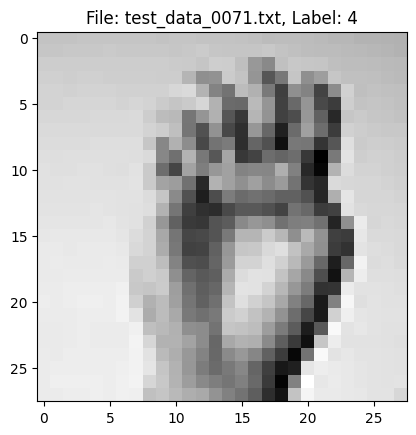

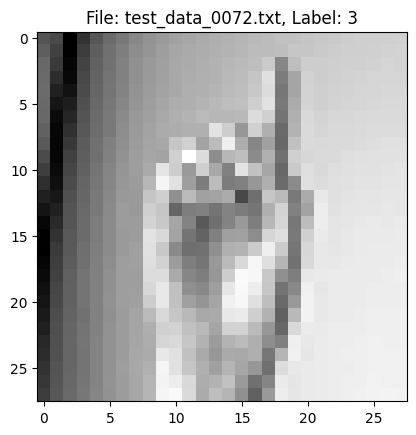

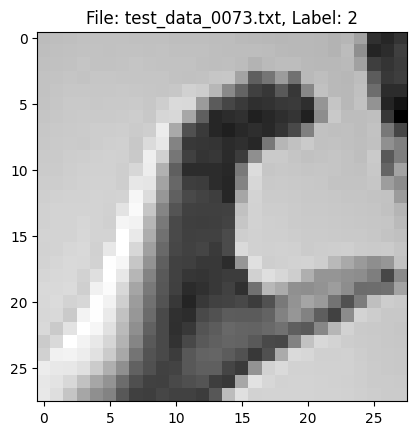

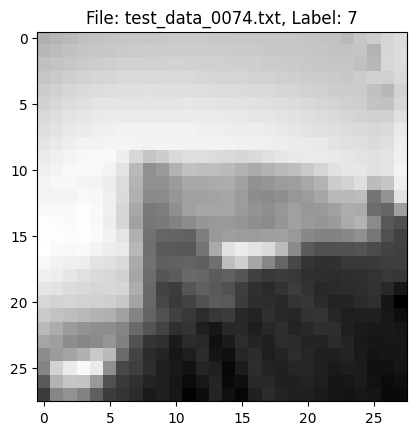

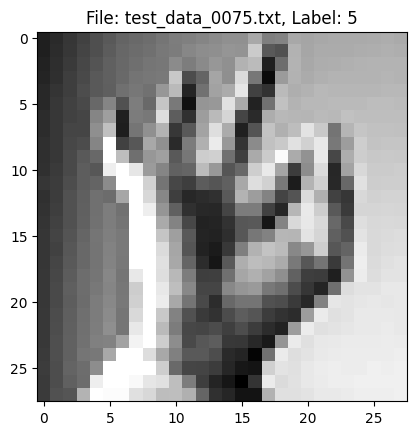

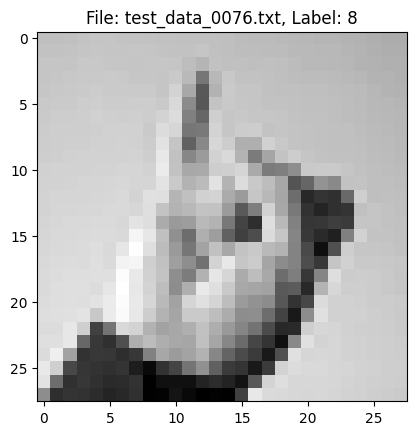

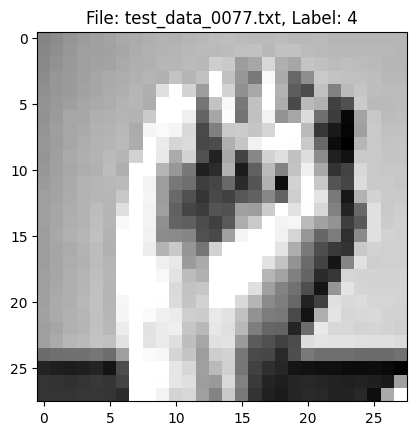

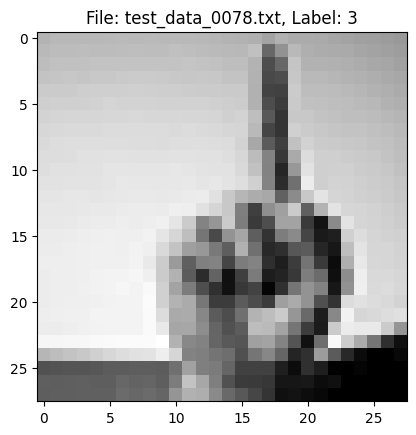

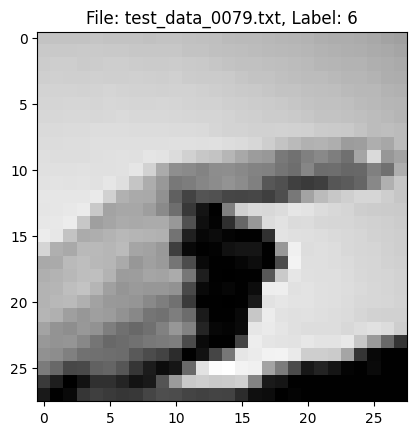

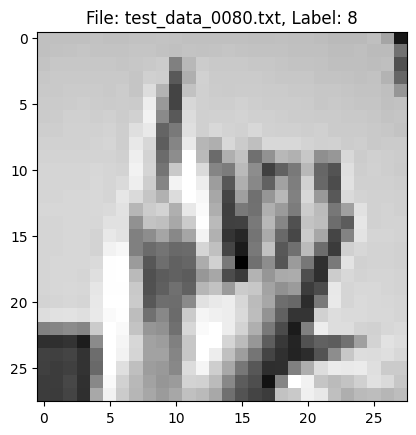

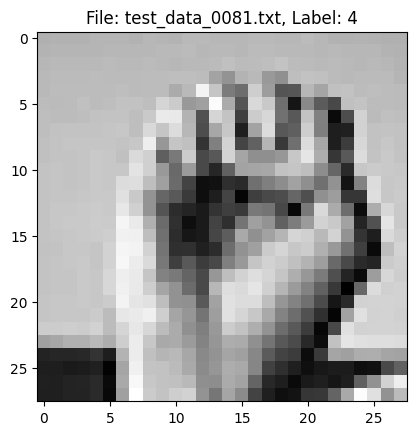

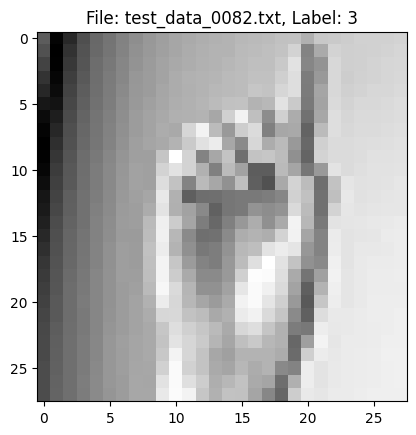

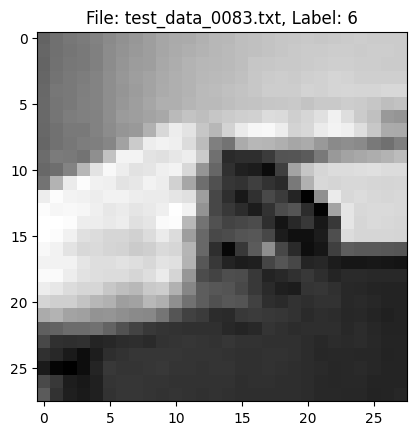

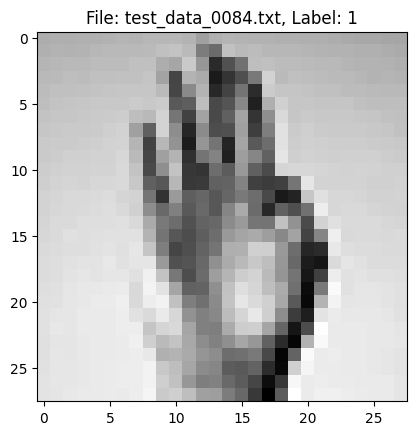

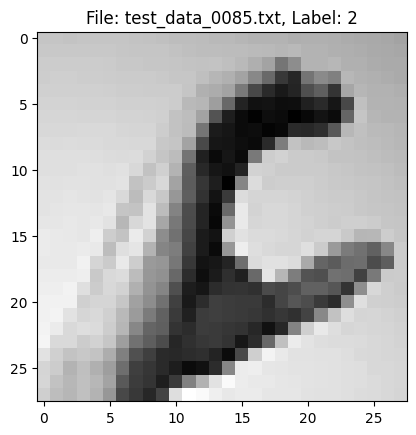

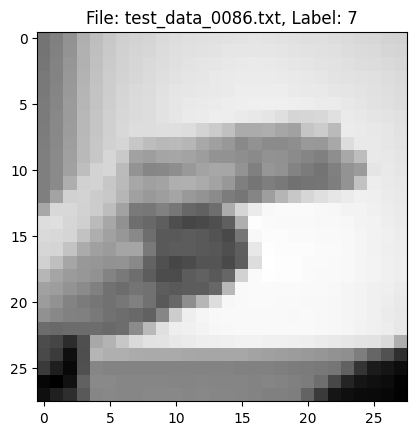

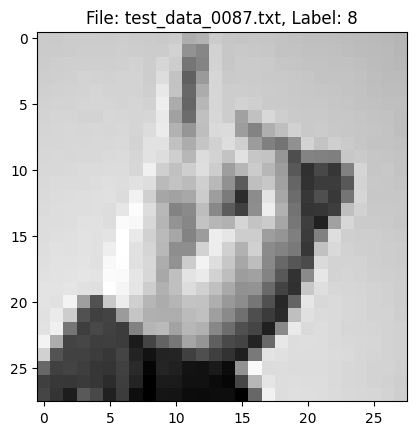

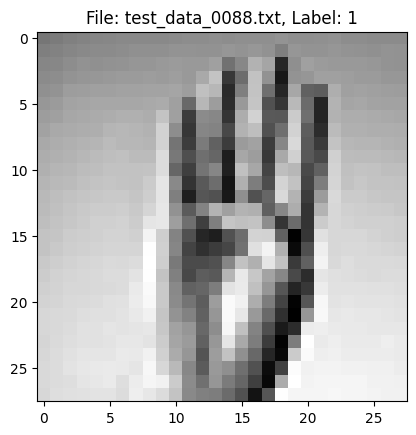

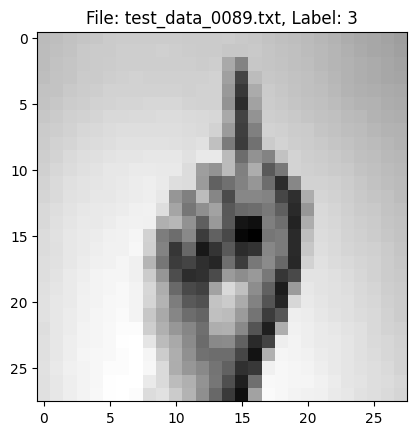

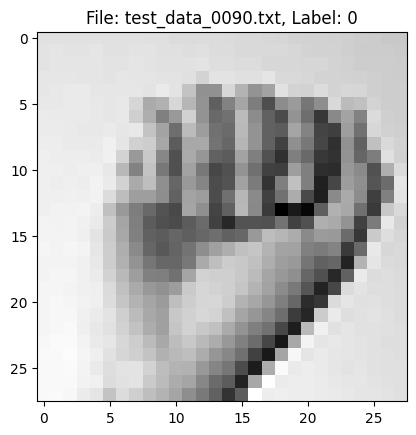

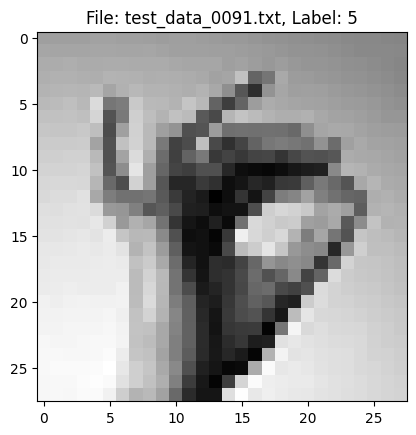

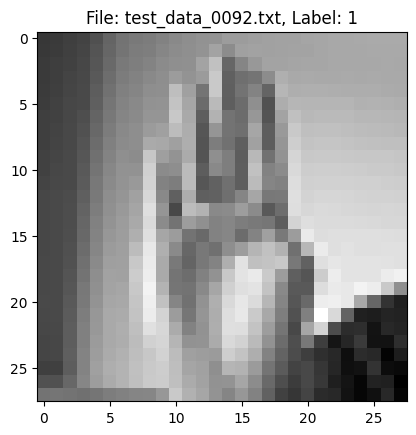

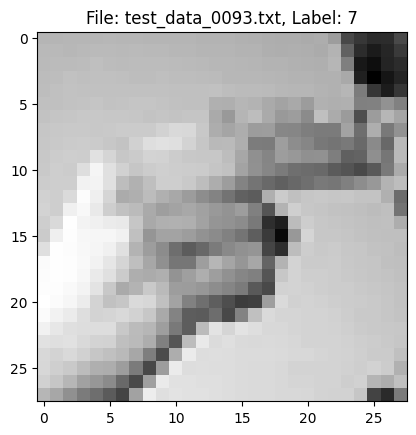

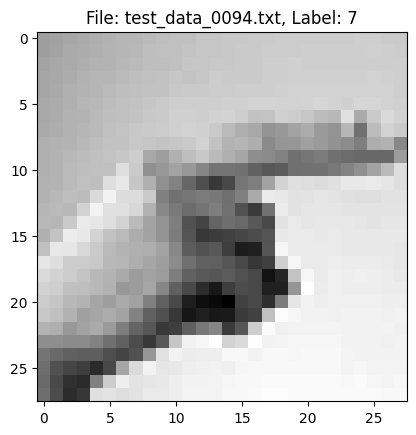

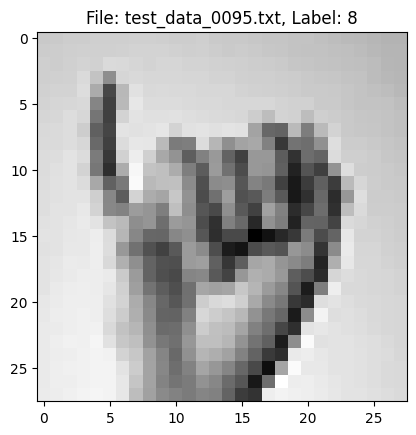

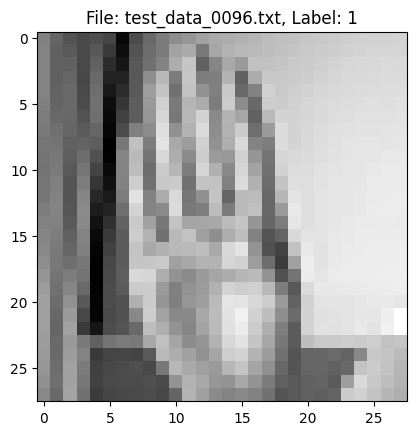

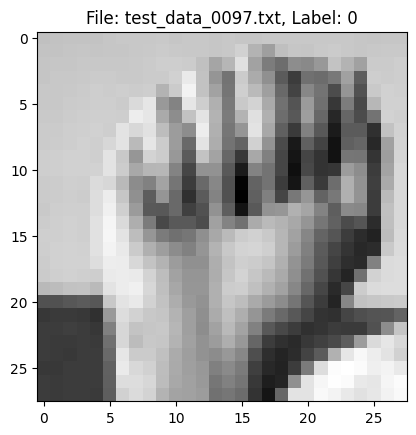

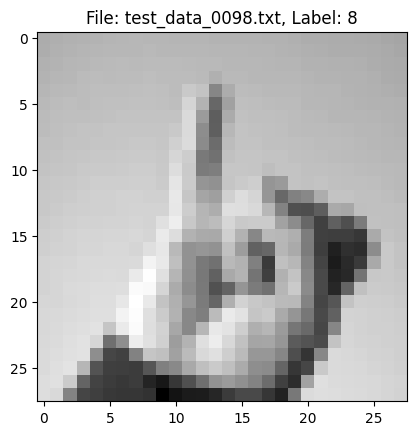

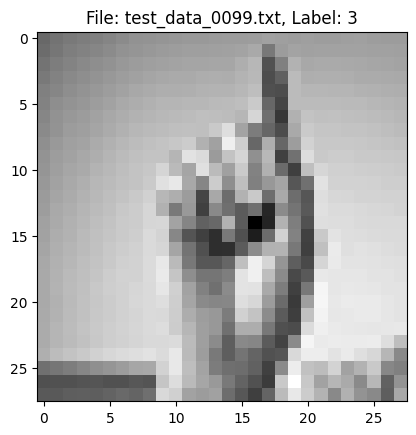

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os

def read_test_data(file_path, data_width=16, int_size=1):
    with open(file_path, 'r') as file:
        data = file.readlines()

    image_data = []

    # Convert binary strings to integers
    for binary_string in data[:-1]:  # Skipping the last line which might contain the label
        integer_value = int(binary_string.strip(), 2)
        # Convert from two's complement if necessary
        if integer_value >= 2**(data_width-1):
            integer_value -= 2**data_width
        # Scale back to pixel values (assuming the fractional part was multiplied)
        pixel_value = integer_value / (2**(data_width - int_size))
        image_data.append(pixel_value)

    # Convert the list into a numpy array and reshape into 28x28 image
    image_array = np.array(image_data).reshape(28, 28)

    # Return the last line as the label (it contains the label in binary format)
    label = int(data[-1].strip(), 2)

    return image_array, label

def display_image(image_array, label, file_name):
    plt.imshow(image_array, cmap='gray')
    plt.title(f'File: {file_name}, Label: {label}')
    plt.show()

# Loop through all the files in the current directory and display images
for i in range(100):  # Loop from 0 to 99
    file_name = f"test_data_{i:04d}.txt"  # Generates file names like test_data_0000.txt, test_data_0001.txt, etc.
    file_path = os.path.join(".", file_name)  # Using current directory
    if os.path.exists(file_path):  # Check if the file exists
        image_array, label = read_test_data(file_path)
        display_image(image_array, label, file_name)
    else:
        print(f"File {file_name} not found.")


In [19]:
import tensorflow as tf
import json
import pandas as pd

# Load the Sign Language MNIST dataset from CSV files
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

# Filter the data to include only the first 10 letters (A-J), which have label values from 0 to 9
train_df = train_df[train_df['label'].isin(range(10))]
test_df = test_df[test_df['label'].isin(range(10))]

# Separate features (pixel values) and labels
x_train = train_df.iloc[:, 1:].values  # Pixel values for training
y_train = train_df.iloc[:, 0].values   # Labels for training
x_test = test_df.iloc[:, 1:].values    # Pixel values for testing
y_test = test_df.iloc[:, 0].values     # Labels for testing

# Reshape and normalize the pixel values
x_train = x_train.reshape(-1, 28, 28)  # Reshape to 28x28 images
x_test = x_test.reshape(-1, 28, 28)    # Reshape to 28x28 images
x_train = tf.keras.utils.normalize(x_train, axis=1)  # Normalize to [0, 1]
x_test = tf.keras.utils.normalize(x_test, axis=1)    # Normalize to [0, 1]

# Define the neural network model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # Flatten the input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid))  # First hidden layer
model.add(tf.keras.layers.Dense(64, activation=tf.nn.sigmoid))   # Second hidden layer
model.add(tf.keras.layers.Dense(32, activation=tf.nn.sigmoid))   # Third hidden layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.sigmoid))   # Fourth hidden layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.sigmoid))   # Output layer (10 neurons for 10 classes)

# Compile the model with optimizer, loss function, and evaluation metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data
model.fit(x_train, y_train, epochs=100)

# Evaluate the model on the test data
val_loss, val_accuracy = model.evaluate(x_test, y_test)

# Extract and save the weights and biases of each layer
weightList = []
biasList = []
for i in range(1, len(model.layers)):
    weights = model.layers[i].get_weights()[0]  # Get the weights
    weightList.append((weights.T).tolist())     # Transpose and convert to list
    bias = [[float(b)] for b in model.layers[i].get_weights()[1]]  # Get the biases
    biasList.append(bias)  # Add to the list

# Save the weights and biases to a JSON file
data = {"weights": weightList, "biases": biasList}
with open('weightsandbiases_ASL_10.txt', "w") as f:
    json.dump(data, f)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1160 - loss: 2.2738
Epoch 2/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1372 - loss: 2.1987
Epoch 3/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2178 - loss: 2.0664
Epoch 4/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2808 - loss: 1.8723
Epoch 5/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4638 - loss: 1.6130
Epoch 6/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5306 - loss: 1.3998
Epoch 7/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6000 - loss: 1.2556
Epoch 8/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6589 - loss: 1.1262
Epoch 9/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6706 - loss: 1.0389
Epoch 10/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7036 - loss: 0.9357
Epoch 11/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7531 - loss: 0.8373
Epoch 12/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step